In [106]:
import pickle
import json
import funcy
import csv
import os
import gzip
import pandas as pd
import numpy as np

from imblearn.under_sampling import RandomUnderSampler

import sklearn

from imblearn.under_sampling import RandomUnderSampler


In [107]:

%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()

In [108]:
v6 = pd.read_pickle(
    '/pool001/lraymond/processed_data/pre_analysis_dfs/standardized_linear_classifier_df.p')

In [109]:
RANDOM_STATE = 0

Y_col = '10_year_cites_top1'
X_cols = [c for c in v6.columns if '_cites' not in c]

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

In [110]:
# we want a 1:1 ratio in each class 
rus = RandomUnderSampler(sampling_strategy=1, return_indices=True, random_state=0)


X = v6[X_cols].as_matrix()
Y = v6[Y_col].as_matrix().reshape(-1)
print(X.shape, Y.shape)

X_resampled, y_resampled, ind = rus.fit_resample(X, Y)

print(X_resampled.shape, y_resampled.shape)


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X_resampled, y_resampled, test_size=0.33, random_state=RANDOM_STATE)

(188672, 166) (188672,)
(3854, 166) (3854,)


In [111]:
svm = sklearn.svm.SVC(
    kernel='sigmoid', C=1.0,
        coef0=0, max_iter=5000, random_state=RANDOM_STATE, probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=5000, probability=True, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
svm.dual_coef_.shape

(1, 1861)

In [69]:
# how to get the margin?
svm.support_vectors_.shape

(1861, 166)

In [112]:
df = svm.decision_function(X_test)

In [113]:
df.shape

(1272,)

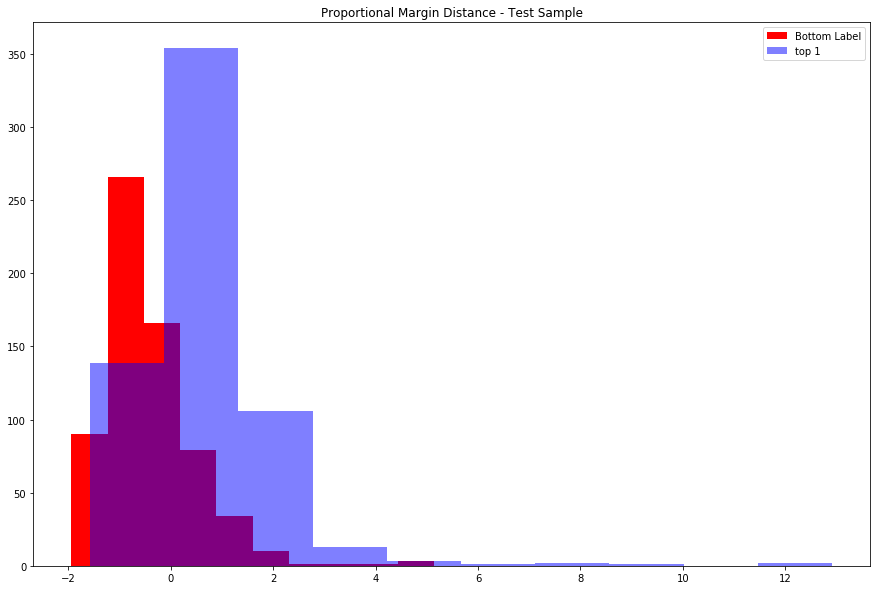

In [114]:
fig = plt.figure(figsize=(15, 10))

plt.hist(df[y_test==0], label='Bottom Label', color='red',)
plt.hist(df[y_test==1], label='top 1', color='blue', alpha=.5)
plt.title('Proportional Margin Distance - Test Sample')
plt.legend()
plt.show()
fig.savefig('plots/Decision Function Distances top1_test.png')

In [115]:
# try with 0 or 1 citation
Y = v6['10_year_cites_above0'].as_matrix().reshape(-1)
print(X.shape, Y.shape)

X_resampled, y_resampled, ind = rus.fit_resample(X, Y)

print(X_resampled.shape, y_resampled.shape)


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X_resampled, y_resampled, test_size=0.33, random_state=RANDOM_STATE)

(188672, 166) (188672,)
(27962, 166) (27962,)


In [117]:
svm = sklearn.svm.SVC(
    kernel='sigmoid', C=1.0, max_iter=20000, random_state=RANDOM_STATE)
print(X_train.shape, y_train.shape)
svm.fit(X_train, y_train)

(18734, 166) (18734,)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=20000, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
df = svm.decision_function(X_test)

df.shape

(9228,)

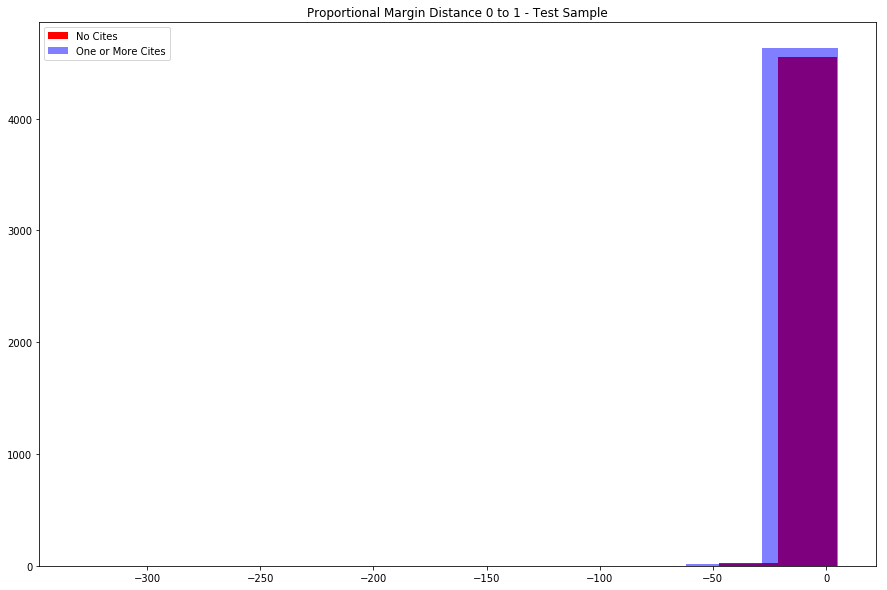

In [120]:
fig = plt.figure(figsize=(15, 10))

plt.hist(df[y_test==0], label='No Cites', color='red',)
plt.hist(df[y_test==1], label='One or More Cites', color='blue', alpha=.5)
plt.title('Proportional Margin Distance 0 to 1 - Test Sample')
plt.legend()
plt.show()
fig.savefig('plots/Decision Function Distances Zero-OneCites_test.png')

In [121]:
# try with top 10 citation
Y = v6['10_year_cites_top10'].as_matrix().reshape(-1)
print(X.shape, Y.shape)

X_resampled, y_resampled, ind = rus.fit_resample(X, Y)

print(X_resampled.shape, y_resampled.shape)


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X_resampled, y_resampled, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)

(188672, 166) (188672,)
(39688, 166) (39688,)
(26590, 166) (13098, 166)


In [122]:
print(X_train.shape, X_test.shape)

(26590, 166) (13098, 166)


In [123]:
svm = sklearn.svm.SVC(
    kernel='sigmoid', C=1.0, max_iter=20000, random_state=RANDOM_STATE)


In [124]:
print(X_train.shape, y_train.shape)
svm.fit(X_train, y_train)

(26590, 166) (26590,)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=20000, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
df = svm.decision_function(X_test)

df.shape

(13098,)

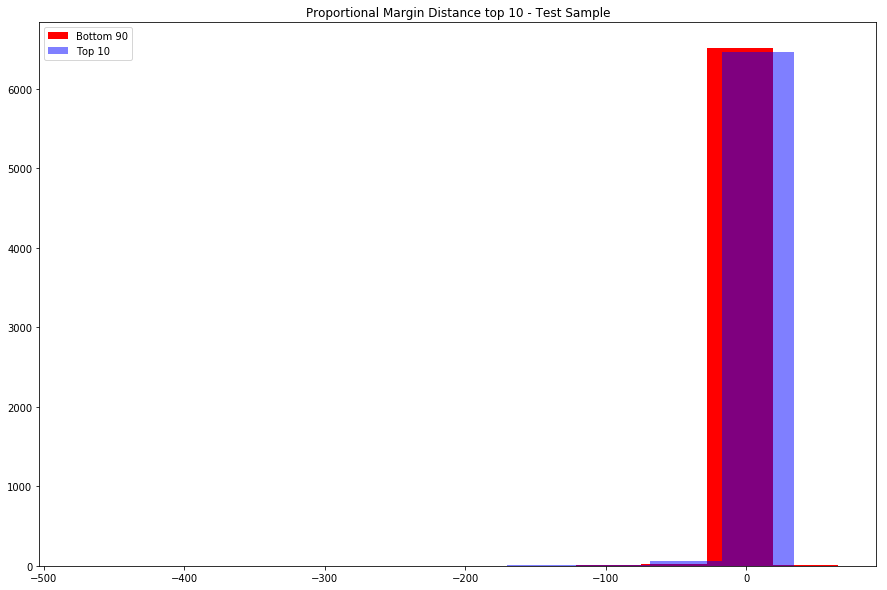

In [126]:
fig = plt.figure(figsize=(15, 10))

plt.hist(df[y_test==0], label='Bottom 90', color='red',)
plt.hist(df[y_test==1], label='Top 10', color='blue', alpha=.5)
plt.title('Proportional Margin Distance top 10 - Test Sample')
plt.legend()
plt.show()
fig.savefig('plots/Decision Function Distances top10Cites_test.png')